# Module tests

In [1]:
import cv2
import numpy as np
import imregpoc
import imutils 
from imshowtools import imshow
import pywt
from Utility import arnoldTransform, arnoldInverseTransform

In [2]:
# for visualize
from matplotlib import pyplot as plt
%matplotlib inline

## Phase correlation module test

Text(0.5, 1.0, 'compared')

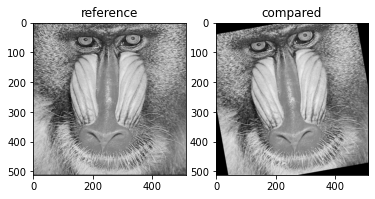

In [3]:
# read monocular image
ref = cv2.imread('imgs/mandril.png',0)
#cmp = cv2.imread('saved_imgs/translated_30_lena.png',0) 
cmp = cv2.imread('attacked_imgs/rotated_10_mandril.png',0)
plt.subplot(121)
plt.imshow(ref,cmap='gray')
plt.title("reference")
plt.subplot(122)
plt.imshow(cmp,cmap='gray')
plt.title("compared")

Init the image matching class

In [4]:
# initialization
result = imregpoc.imregpoc(ref,cmp)

get transformation matrix

In [5]:
result.getPerspective()

array([[  0.9849964 ,   0.17338741, -40.536114  ],
       [ -0.17338741,   0.9849964 ,  48.235657  ],
       [  0.        ,   0.        ,   1.        ]], dtype=float32)

get transformation parameter
[ dx
  dy
  $\theta$
  scale]

In [6]:
result.getParam()

[0.008697825, 0.009199215, 0.1742434, 1.000140519550101]

check wheather this extraction is valid or not

In [7]:
result.isSucceed()

1

show stitched image

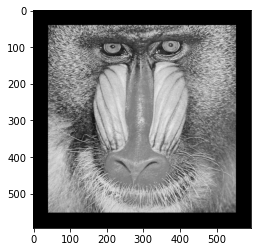

In [8]:
result.stitching()

## Feature point based matching module test

Matched Points Number:3540


([array([-0.04541247]),
  array([0.03628194]),
  10.001519707511488,
  0.9999894391379591],
 1754,
 1702)

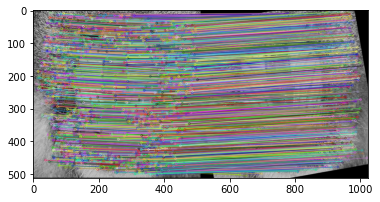

In [9]:
# initialization (SIFT can be changed to other descriptor)
#matcher = imregpoc.TempMatcher(ref,'AKAZE') #OK 
matcher = imregpoc.TempMatcher(ref,'SIFT') #OK 
#matcher = imregpoc.TempMatcher(ref,'KAZE') #OK
#matcher = imregpoc.TempMatcher(ref,'FREAK') #OK
#matcher = imregpoc.TempMatcher(ref,'ORB') #OK 
#matcher = imregpoc.TempMatcher(ref,'SURF') #NG
matcher.match(cmp,1)

Scaling: 
Matched Points Number:3540


0.9999894391379591

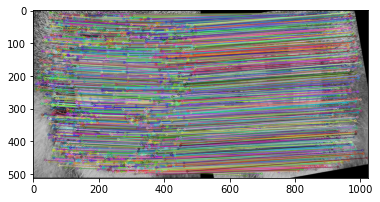

In [10]:
print("Scaling: ")
matcher.match(cmp,1)[0][3]

Rotation: 
Matched Points Number:3540


10.001519707511488

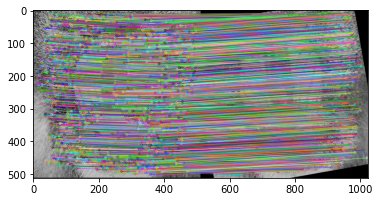

In [11]:
print("Rotation: ")
matcher.match(cmp,1)[0][2]

Translation: 
Matched Points Number:3540
Matched Points Number:3540


(-0.04541247041653711, 0.036281939457445185)

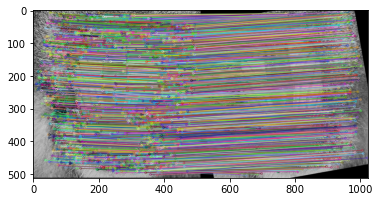

In [12]:
print("Translation: ")
matcher.match(cmp,1)[0][0][0], matcher.match(cmp,1)[0][1][0] 

Matched Points Number:3540


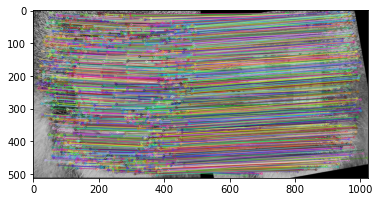

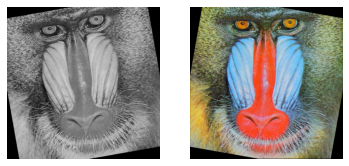

In [13]:
img = cv2.imread('attacked_imgs/rotated_10_mandril.png')
rerotate_img = imutils.rotate(img, -1*matcher.match(cmp,1)[0][2])
imshow(cmp, rerotate_img, mode='BGR')

(512, 512, 3)


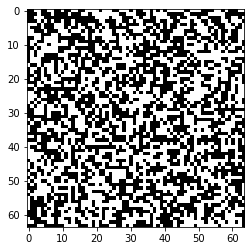

In [14]:
#Extract master share with RST estimation
#Y_split = rerotate_img[:,:,0]
img = cv2.cvtColor(rerotate_img, cv2.COLOR_BGR2YCrCb)
print(rerotate_img.shape)
Y_split = img[:,:,0]
coeffs = pywt.wavedec2(np.array(Y_split), wavelet='haar',level=3)
LL, [LH3,HL3,HH3],[LH2,HL2,HH2],[LH1,HL1,HH1] = coeffs
dct_img = cv2.dct(LL, cv2.DCT_ROWS)
img1 = np.uint8(dct_img)
# master share
ms_img = img1
#plt.imshow(img1, cmap='Greys') 
#plt.show()
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        if (img1[i][j] >= 128):
            ms_img[i][j] = 255
        else: 
            ms_img[i][j] = 0
            
plt.imshow(ms_img, cmap='Greys') 
plt.show()

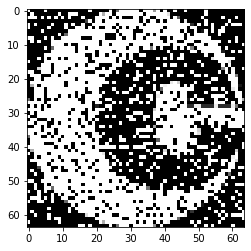

In [15]:
# arnoldTransform process
a = 6
b = 40
key = 33
os_img = cv2.imread("./os_img/os_mandril.png", 0)
#os_img = cv2.imread("./os_img/os_test.png", 0)
wm_ar_xor = img1 
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
            wm_ar_xor[i][j] = ms_img[i][j] ^ os_img[i][j]
            
wm_ar_inv1 = arnoldInverseTransform(wm_ar_xor, key)
wm_ar_inv1.shape
plt.imshow(wm_ar_inv1, cmap='Greys') 
plt.show()

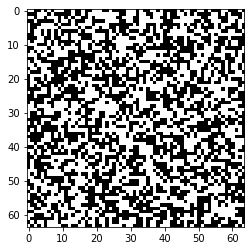

In [16]:
#Extract master share without RST estimation
#Y_split = rerotate_img[:,:,0]
img = cv2.imread('attacked_imgs/rotated_10_mandril.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
Y_split = img[:,:,0]
coeffs = pywt.wavedec2(np.array(Y_split), wavelet='haar',level=3)
LL, [LH3,HL3,HH3],[LH2,HL2,HH2],[LH1,HL1,HH1] = coeffs
dct_img = cv2.dct(LL, cv2.DCT_ROWS)
img1 = np.uint8(dct_img)
# master share
ms_img = img1
#plt.imshow(img1, cmap='Greys') 
#plt.show()
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        if (img1[i][j] >= 128):
            ms_img[i][j] = 255
        else: 
            ms_img[i][j] = 0
            
plt.imshow(ms_img, cmap='Greys') 
plt.show()

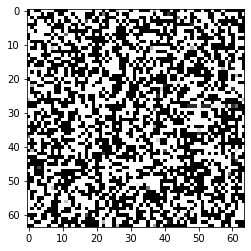

In [17]:
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
            wm_ar_xor[i][j] = ms_img[i][j] ^ os_img[i][j]
            
wm_ar_inv1 = arnoldInverseTransform(wm_ar_xor, key)
wm_ar_inv1.shape
plt.imshow(wm_ar_inv1, cmap='Greys') 
plt.show()

Text(0.5, 1.0, 'compared')

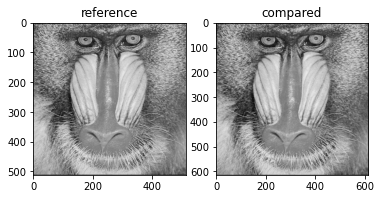

In [18]:
# read monocular image
ref = cv2.imread('imgs/mandril.png',0)
#cmp = cv2.imread('saved_imgs/translated_30_lena.png',0) 
cmp = cv2.imread('attacked_imgs/scaled_120_mandril.png',0)
plt.subplot(121)
plt.imshow(ref,cmap='gray')
plt.title("reference")
plt.subplot(122)
plt.imshow(cmp,cmap='gray')
plt.title("compared")


In [19]:
# initialization
result = imregpoc.imregpoc(ref,cmp)
result.getParam()

The size of two input images are not equal! Estimation could be inaccurate.


[42.786533, 42.739082, 0.0, 1.1981558799743652]

Matched Points Number:6331


([array([42.71252077]),
  array([42.70174313]),
  0.0007668521400975692,
  1.2000053827753914],
 2016,
 2015)

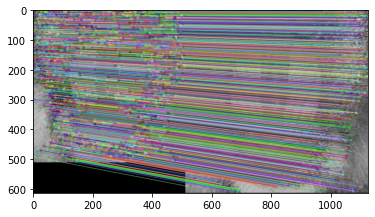

In [20]:
# initialization (SIFT can be changed to other descriptor)
#matcher = imregpoc.TempMatcher(ref,'AKAZE') #OK 
matcher = imregpoc.TempMatcher(ref,'SIFT') #OK 
#matcher = imregpoc.TempMatcher(ref,'KAZE') #OK
#matcher = imregpoc.TempMatcher(ref,'FREAK') #OK
#matcher = imregpoc.TempMatcher(ref,'ORB') #OK 
#matcher = imregpoc.TempMatcher(ref,'SURF') #NG
matcher.match(cmp,1)

Matched Points Number:6331
Matched Points Number:6331


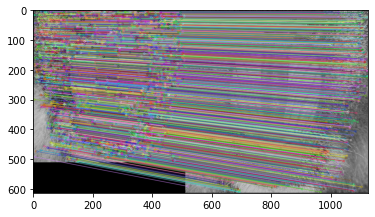

In [21]:
attack_img = cv2.imread('attacked_imgs/scaled_120_mandril.png')
rescale_img = cv2.resize(attack_img, None, fx = 1/matcher.match(cmp,1)[0][3], fy = 1/matcher.match(cmp,1)[0][3])

(512, 512, 3)


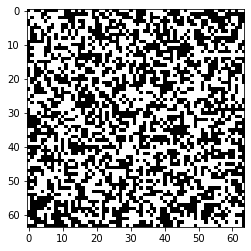

In [22]:
#Extract master share with RST estimation
#Y_split = rerotate_img[:,:,0]
img = cv2.cvtColor(rescale_img, cv2.COLOR_BGR2YCrCb)
print(rescale_img.shape)
Y_split = img[:,:,0]
coeffs = pywt.wavedec2(np.array(Y_split), wavelet='haar',level=3)
LL, [LH3,HL3,HH3],[LH2,HL2,HH2],[LH1,HL1,HH1] = coeffs
dct_img = cv2.dct(LL, cv2.DCT_ROWS)
img1 = np.uint8(dct_img)
# master share
ms_img = img1
#plt.imshow(img1, cmap='Greys') 
#plt.show()
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        if (img1[i][j] >= 128):
            ms_img[i][j] = 255
        else: 
            ms_img[i][j] = 0
            
plt.imshow(ms_img, cmap='Greys') 
plt.show()

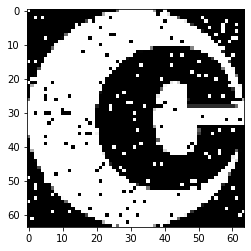

In [23]:
# arnoldTransform process
a = 6
b = 40
key = 33
os_img = cv2.imread("./os_img/os_mandril.png", 0)
#os_img = cv2.imread("./os_img/os_test.png", 0)
wm_ar_xor = img1 
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
            wm_ar_xor[i][j] = ms_img[i][j] ^ os_img[i][j]
            
wm_ar_inv1 = arnoldInverseTransform(wm_ar_xor, key)
wm_ar_inv1.shape
plt.imshow(wm_ar_inv1, cmap='Greys') 
plt.show()